## 1. Initial Question



What are the factors impacting the salary of a data scientist?
What is the salary trend for data scientist? and its comparison to living cost?
What is the predicted salary for Data Scientist in next 5 years?

1. Many people thinks that tech companies pays well above average and cost of living. Is this true?
2. Many people thinks that you don’t need a degree to work in these tech companies. Is this true?
3. Are women underpaid in these companies?
4. Are non-whites paid lower than whites in these companies?
5. Does years in company affect value of granted stock and bonus?
6. For the same position or job level, does location affect base salary regardless of gender and race?


## 2. Overview and Motivation

The Harvard Business Review indicates data scientist as the sexist job of the 21st century. 

According to the Glassdoor 2022, data scientist rank the top 3 best job in America for 7 years running. This ranking is based on the career opportunites rating, number of opening jobs, and the average salaries. The median base salary is $120,000. The job opening were also spiking up from 1,736 in 2016 to 10,071 in 2022. 

Motivation?

## 3. Related Work

<b> 1. Salary Prediction in the IT Job Market with Few High-Dimensional Samples: A Spanish Case Study </b><br>
This paper study predict the salary of IT jobs using data from Tecnoempleo, an e-Recruitment website. The result shows that experience, job stability or certain roles contribute significantly to the salary. Besides, decision trees yield a bettery accuracy (84%) than voting committe based tools.

<b> 2. Gender-based salary differences in academic medicine: a retrospective review of data from six public medical centers in the Western USA </b> <br>
The paper study the effects of gender, rank and speciality of the acedemic medical centers in the Western USA. among the 799 faculty members, it is found that male are paid significantly higher than feamle in general surgery and obstetrics and gynaecology. It is estimated female are paid ~$75,000 lower than their male colleague.

<b> 3. Improving students' motivation to study using salary prediction system </b> <br>
This paper proposes a salary prediction system for increasing students' motivation in studying. A decision tree technique is used to generate a prediction model with seven features.The result shows that the system can effectively boost students' motivation in studying and also show them a positive viewpoint of their future. 

<b> 4. Salary Equity: Similarities and Differences in Outcomes from Two Common Prediction Models </b> <br>
Multiple regression was used to develop salary prediction equations, one from each of the two faculty samples most frequently utilized in this type of research (males only, all faculty).

<b> 5. Quantitative analysis of historical data for prediction of job salary in India - A case study </b> <br>
In this paper an attempt has been made to develop a quantitative approach for predicting the factors that affect the salary of an individual. The Aspiring Minds’ Employability Outcomes (AMEO-2015) dataset consisting of Aspiring Minds’ Computer Adaptive Test (AMCAT) score along with job seeker personal and employment details of Indian students has been considered for the study. In order to analyze the effect of more than one independent variable on dependent variable multiple linear regression models has been applied. The model has been used on the training data to predict dependent variables and to extract features with highest impact on salary prediction.


## 4. Data Cleaning / Data Preprocessing

4.01 Extract the data from levels.fyi

In [1]:
import pandas as pd
import requests
import numpy as np
import matplotlib.pyplot as plt
data = requests.get('https://www.levels.fyi/js/salaryData.json').json()
df = pd.DataFrame(data)
df.head()

,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,stockgrantvalue,bonus,gender,otherdetails,cityid,dmaid,rowNumber
0,6/7/2017 11:33:27,Oracle,L3,Product Manager,186,"Redwood City, CA",1,1,,160,17,9,,,7392,807,1
1,6/10/2017 17:11:29,eBay,SE 2,Software Engineer,0,"San Francisco, CA",3,4,,0,0,0,,,7419,807,2
2,6/11/2017 14:53:57,Amazon,L7,Product Manager,126,"Seattle, WA",10,0,,126,0,0,,,11527,819,3
3,6/14/2017 21:22:25,Microsoft,64,Software Engineering Manager,171348,"Redmond, WA",13,13,,92799,55371,23178,,,11521,819,5
4,6/16/2017 10:44:01,Amazon,L5,Software Engineer,214175,"Vancouver, BC, Canada",13,1,,156335,0,57840,,,1320,0,6


4.02 View all columns in the datasets

In [3]:
df.columns

Index(['timestamp', 'company', 'level', 'title', 'totalyearlycompensation',
       'location', 'yearsofexperience', 'yearsatcompany', 'tag', 'basesalary',
       'stockgrantvalue', 'bonus', 'gender', 'otherdetails', 'cityid', 'dmaid',
       'rowNumber'],
      dtype='object')

4.03 Extract the dataset to a .xlsx file and save it in local

In [4]:
df = pd.read_excel (r'C:\Users\nrosnei\OneDrive - InfoVista\Desktop\MASTER\COURSES SEM 1\WQD7003 DATA ANALYTICS\Assignment\Levels_Salary_Data_2017-2022_new.xlsx')
df.head()

,Unnamed: 0,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,stockgrantvalue,bonus,gender,otherdetails,cityid,dmaid,rowNumber
0,0,6/7/2017 11:33:27,Oracle,L3,Product Manager,186,"Redwood City, CA",1,1,NaN,160,17,9,NaN,NaN,7392,807.0,1
1,1,6/10/2017 17:11:29,eBay,SE 2,Software Engineer,0,"San Francisco, CA",3,4,NaN,0,0,0,NaN,NaN,7419,807.0,2
2,2,6/11/2017 14:53:57,Amazon,L7,Product Manager,126,"Seattle, WA",10,0,NaN,126,0,0,NaN,NaN,11527,819.0,3
3,3,6/14/2017 21:22:25,Microsoft,64,Software Engineering Manager,171348,"Redmond, WA",13,13,NaN,92799,55371,23178,NaN,NaN,11521,819.0,5
4,4,6/16/2017 10:44:01,Amazon,L5,Software Engineer,214175,"Vancouver, BC, Canada",13,1,NaN,156335,0,57840,NaN,NaN,1320,0.0,6


4.04 Select the most relatable and important columns for the analysis and create a sub dataframe

In [5]:
df_sub = df[['timestamp', 'company', 'title', 'totalyearlycompensation',
       'location', 'yearsofexperience', 'yearsatcompany', 'basesalary',
       'stockgrantvalue', 'bonus','gender']]
df_sub

,timestamp,company,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,basesalary,stockgrantvalue,bonus,gender
0,6/7/2017 11:33:27,Oracle,Product Manager,186,"Redwood City, CA",1,1,160,17,9,NaN
1,6/10/2017 17:11:29,eBay,Software Engineer,0,"San Francisco, CA",3,4,0,0,0,NaN
2,6/11/2017 14:53:57,Amazon,Product Manager,126,"Seattle, WA",10,0,126,0,0,NaN
3,6/14/2017 21:22:25,Microsoft,Software Engineering Manager,171348,"Redmond, WA",13,13,92799,55371,23178,NaN
4,6/16/2017 10:44:01,Amazon,Software Engineer,214175,"Vancouver, BC, Canada",13,1,156335,0,57840,NaN
...,...,...,...,...,...,...,...,...,...,...,...
62637,8/17/2021 8:16:36,Amazon,Product Manager,272,"Seattle, WA",7,0,176,51,45,Female
62638,8/17/2021 8:22:17,Fidelity Investments,Software Engineer,50,"Durham, NC",0,0,43,0,7,Male
62639,8/17/2021 8:24:56,Cisco,Software Engineer,200,"San Jose, CA",3,6,179,7,14,Male
62640,8/17/2021 8:26:21,HSBC,Software Engineer,86,"New York, NY",10,5,72,0,14,NaN


4.05 Identify if there is missing data in each columns

In [7]:
df_sub.isna().sum()

timestamp                      0
company                        5
title                          0
totalyearlycompensation        0
location                       0
yearsofexperience              0
yearsatcompany                 0
basesalary                     0
stockgrantvalue                0
bonus                          0
gender                     19540
dtype: int64

4.06 Identify the data types of each variables/columns

In [8]:
df_sub.dtypes

timestamp                  object
company                    object
title                      object
totalyearlycompensation     int64
location                   object
yearsofexperience           int64
yearsatcompany              int64
basesalary                  int64
stockgrantvalue             int64
bonus                       int64
gender                     object
dtype: object

4.07 Found out that timestamp is an object. Change it to the appropriate data type

In [12]:
df_sub['timestamp'] = pd.to_datetime(df_sub['timestamp'], format='%m/%d/%Y %H:%M:%S')

C:\Users\nrosnei\AppData\Local\Temp/ipykernel_24140/1635266630.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sub['timestamp'] = pd.to_datetime(df_sub['timestamp'], format='%m/%d/%Y %H:%M:%S')


In [13]:
df_sub.dtypes

timestamp                  datetime64[ns]
company                            object
title                              object
totalyearlycompensation             int64
location                           object
yearsofexperience                   int64
yearsatcompany                      int64
basesalary                          int64
stockgrantvalue                     int64
bonus                               int64
gender                             object
dtype: object

4.08 Display the summary of the sub-dataset

In [11]:
df_sub.info

<bound method DataFrame.info of                 timestamp               company                         title  \
0     2017-06-07 11:33:27                Oracle               Product Manager   
1     2017-06-10 17:11:29                  eBay             Software Engineer   
2     2017-06-11 14:53:57                Amazon               Product Manager   
3     2017-06-14 21:22:25             Microsoft  Software Engineering Manager   
4     2017-06-16 10:44:01                Amazon             Software Engineer   
...                   ...                   ...                           ...   
62637 2021-08-17 08:16:36                Amazon               Product Manager   
62638 2021-08-17 08:22:17  Fidelity Investments             Software Engineer   
62639 2021-08-17 08:24:56                 Cisco             Software Engineer   
62640 2021-08-17 08:26:21                  HSBC             Software Engineer   
62641 2021-08-17 08:28:57                 Adobe              Product Designer

4.09 Summarize the datasets in statistical wise so we can have in-depth knowledge on each of every variables

In [14]:
df_sub.describe(include='all',datetime_is_numeric=True)

,timestamp,company,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,basesalary,stockgrantvalue,bonus,gender
count,62642,62637,62642,6.264200e+04,62642,62642.000000,62642.000000,6.264200e+04,6.264200e+04,62642.000000,43102
unique,NaN,1869,15,NaN,1050,NaN,NaN,NaN,NaN,NaN,4
top,NaN,Amazon,Software Engineer,NaN,"Seattle, WA",NaN,NaN,NaN,NaN,NaN,Male
freq,NaN,8054,41231,NaN,8701,NaN,NaN,NaN,NaN,NaN,35702
mean,2020-07-17 03:30:08.313815040,NaN,NaN,3.175327e+03,NaN,7.191054,2.700616,1.798145e+03,1.134865e+03,242.317199,NaN
min,2017-06-07 11:33:27,NaN,NaN,0.000000e+00,NaN,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,NaN
25%,2020-01-11 23:12:55.500000,NaN,NaN,1.160000e+02,NaN,3.000000,0.000000,8.800000e+01,0.000000e+00,1.000000,NaN
50%,2020-09-21 16:31:21,NaN,NaN,1.830000e+02,NaN,6.000000,1.000000,1.310000e+02,2.300000e+01,13.000000,NaN
75%,2021-03-26 15:19:06.500000,NaN,NaN,2.690000e+02,NaN,10.000000,4.000000,1.810000e+02,6.400000e+01,27.000000,NaN
max,2021-08-17 08:28:57,NaN,NaN,3.386013e+06,NaN,90.000000,90.000000,2.057772e+06,3.140803e+06,384026.000000,NaN


4.10 Identify the total of not-null rows

In [15]:
df_sub.notnull().sum()

timestamp                  62642
company                    62637
title                      62642
totalyearlycompensation    62642
location                   62642
yearsofexperience          62642
yearsatcompany             62642
basesalary                 62642
stockgrantvalue            62642
bonus                      62642
gender                     43102
dtype: int64

4.11 We can see that there is slight different on not-null sum above. First, we will be displaying the NaN value in company column

In [16]:
df_sub[df_sub['company'].isna()]

,timestamp,company,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,basesalary,stockgrantvalue,bonus,gender
1977,2018-09-23 15:53:13,NaN,Software Engineering Manager,371,"Austin, TX",18,4,322,0,49,NaN
9315,2019-07-11 07:28:03,NaN,Software Engineer,114,"Atlanta, GA",1,0,107,0,7,Male
9789,2019-07-23 20:47:51,NaN,Software Engineer,58,"Melbourne, VI, Australia",2,1,58,0,0,Male
27788,2020-08-19 01:49:49,NaN,Software Engineer,150,"Dublin, DN, Ireland",3,1,150,0,0,Male
30223,2020-09-09 17:52:14,NaN,Software Engineer,81,"Arlington, VA",3,2,81,0,0,Male


4.12 There are 5 rows that have NaN values, so we can drop the rows since it is not really a huge chunk of data

In [17]:
df_sub = df_sub.dropna(subset=['company'])
df_sub.isna().sum()

timestamp                      0
company                        0
title                          0
totalyearlycompensation        0
location                       0
yearsofexperience              0
yearsatcompany                 0
basesalary                     0
stockgrantvalue                0
bonus                          0
gender                     19539
dtype: int64

<b> 5. Data Cleaning for the "Company" column </b> <br>
Now we know that, there are plenty of inconsistent string values in company column, so we need to clean the mess first

5.1 Convert all string value in company column as lower case

In [18]:
#df_sub = df_sub.apply(lambda x: x.str.lower() if x.dtype == "object" else x)  

df_sub['company'] = df_sub['company'].str.lower()
df_sub.head()

C:\Users\nrosnei\AppData\Local\Temp/ipykernel_24140/374074466.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sub['company'] = df_sub['company'].str.lower()


,timestamp,company,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,basesalary,stockgrantvalue,bonus,gender
0,2017-06-07 11:33:27,oracle,Product Manager,186,"Redwood City, CA",1,1,160,17,9,NaN
1,2017-06-10 17:11:29,ebay,Software Engineer,0,"San Francisco, CA",3,4,0,0,0,NaN
2,2017-06-11 14:53:57,amazon,Product Manager,126,"Seattle, WA",10,0,126,0,0,NaN
3,2017-06-14 21:22:25,microsoft,Software Engineering Manager,171348,"Redmond, WA",13,13,92799,55371,23178,NaN
4,2017-06-16 10:44:01,amazon,Software Engineer,214175,"Vancouver, BC, Canada",13,1,156335,0,57840,NaN


5.2 Identify the sum of unique values for column variable

In [19]:
import re
import numpy as np
np.set_printoptions(threshold=np.inf)

In [20]:
df_sub.company.nunique()

1336

5.3 Remove instances such as .com, .net, .fit, .org in company columns

In [21]:
def regex_remove(inp):
    
    remove_com = re.compile(r'[.](com)')
    remove_org = re.compile(r'[.](org)')
    remove_fit = re.compile(r'[.](fit)')
    remove_net = re.compile(r'[.](net)')
    remove_inc = re.compile(r'[.](inc)')
    remove_org = re.compile(r'[.](ai)')
    
    inp = str(inp)
    inp = remove_com.sub('', inp)  
    inp = remove_org.sub('', inp)
    inp = remove_fit.sub('', inp)
    inp = remove_net.sub('', inp)
    inp = remove_inc.sub('', inp)
    inp = remove_org.sub('', inp)
    
    return inp
    
dcom = df_sub
dcom['company'] = dcom['company'].map(lambda x: regex_remove(x))

C:\Users\nrosnei\AppData\Local\Temp/ipykernel_24140/1158272187.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dcom['company'] = dcom['company'].map(lambda x: regex_remove(x))


5.4 Display all unique values after removing those instances & special characters

In [22]:
df_comp = df_sub.company.unique()
df_comp

array(['oracle', 'ebay', 'amazon', 'microsoft', 'apple', 'uber',
       'salesforce', 'facebook', 'oath', 'google', 'netflix', 'expedia',
       'zillow', 'pinterest', 'linkedin', 'intuit', 'yahoo', 'adobe',
       'symantec', 'dell technologies', 'vmware', 'intel corporation',
       'intel', 'snap', 'lyft', 'sony', 'cruise', 'yelp', 'airbnb',
       'covermymeds', 'epam', 'nvidia', 'sap', 'credit karma',
       'walmart labs', 'twitter', 'slack', 'tableau software', 'cisco',
       'splunk', 'mixpanel', 'verizon', 'zynga', 'dropbox', 'ibm',
       'shutterstock', 'spotify', 'capital one', 'twilio', 'qualcomm',
       'intercom', 'workday', 'amd', 'tesla', 'paypal', 'box', 'visa',
       'ge digital', 'hewlett packard enterprise', 'ca technologies',
       'goldman sachs', 'square', 'usaa', 'starbucks', 'akamai',
       'toyota research institute', 'nordstrom', 'activision',
       'playstation', 'squarespace', 'informatica', 'blackbaud', 'ge',
       'godaddy', 'wework', 'citadel', '

For revision, display all current categorical variables that we need to analyze

In [23]:
##Exploring categorical variables

cat_var = (df_sub.dtypes == 'object')
object_cols = list(cat_var[cat_var].index)
object_cols

['company', 'title', 'location', 'gender']

In [24]:
for column in object_cols:
    print(f"Total categories in the feature '{column}':\n", df_sub[column].value_counts(), '\n-------------------------------------')

Total categories in the feature 'company':
 amazon        8133
microsoft     5187
google        4345
facebook      2975
apple         2034
              ... 
cognizant        1
nintendo         1
sephora          1
airbnb           1
johnson          1
Name: company, Length: 1334, dtype: int64 
-------------------------------------
Total categories in the feature 'title':
 Software Engineer               41227
Product Manager                  4673
Software Engineering Manager     3568
Data Scientist                   2578
Hardware Engineer                2200
Product Designer                 1516
Technical Program Manager        1381
Solution Architect               1157
Management Consultant             976
Business Analyst                  885
Marketing                         710
Mechanical Engineer               490
Sales                             461
Recruiter                         451
Human Resources                   364
Name: title, dtype: int64 
---------------------------

<b> 6. Data Cleaning for the "gender" column </b> <br>
Strange thing spotted in gender column, there are huge amount of NaN values and unidentified gender

6.1 Replacing non-related identity with "unknown" in gender column

In [25]:
df_sub['gender'].replace('Title: Senior Software Engineer', np.nan, inplace=True)

C:\Users\nrosnei\Anaconda3\lib\site-packages\pandas\core\generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


6.2 Replacing the NaN values with "unknown"

In [26]:
df_sub["gender"].fillna("unknown", inplace = True) 
df_sub

C:\Users\nrosnei\Anaconda3\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


,timestamp,company,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,basesalary,stockgrantvalue,bonus,gender
0,2017-06-07 11:33:27,oracle,Product Manager,186,"Redwood City, CA",1,1,160,17,9,unknown
1,2017-06-10 17:11:29,ebay,Software Engineer,0,"San Francisco, CA",3,4,0,0,0,unknown
2,2017-06-11 14:53:57,amazon,Product Manager,126,"Seattle, WA",10,0,126,0,0,unknown
3,2017-06-14 21:22:25,microsoft,Software Engineering Manager,171348,"Redmond, WA",13,13,92799,55371,23178,unknown
4,2017-06-16 10:44:01,amazon,Software Engineer,214175,"Vancouver, BC, Canada",13,1,156335,0,57840,unknown
...,...,...,...,...,...,...,...,...,...,...,...
62637,2021-08-17 08:16:36,amazon,Product Manager,272,"Seattle, WA",7,0,176,51,45,Female
62638,2021-08-17 08:22:17,fidelity investments,Software Engineer,50,"Durham, NC",0,0,43,0,7,Male
62639,2021-08-17 08:24:56,cisco,Software Engineer,200,"San Jose, CA",3,6,179,7,14,Male
62640,2021-08-17 08:26:21,hsbc,Software Engineer,86,"New York, NY",10,5,72,0,14,unknown


6.3 Display the gender distribution in a table

In [27]:
df_gen=pd.DataFrame(df_sub['gender'],columns=['gender','Count'])
df_gen['Count']=1
df_gen=df_gen.groupby('gender').sum()

df_gen.reset_index(inplace=True)
df_gen.sort_values('Count',ascending=False,inplace=True)

df_gen

,gender,Count
1,Male,35698
3,unknown,19540
0,Female,6999
2,Other,400


6.4 Plot a pie chart for better visualization

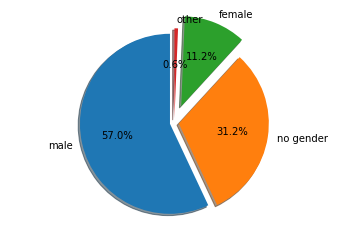

In [158]:
gent = df_gen['gender']
count_gen = df_gen['Count']
myexplode = [0.05, 0.05, 0.2, 0.05]

fig1, ax1 = plt.subplots()
ax1.pie(count_gen, radius=1, explode=myexplode, labels=gent, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')

plt.show()

<b> 7. Data visualisation for the "title" column </b> <br>
Construct a table for title distribution

In [29]:
df_position=pd.DataFrame(df_sub['title'],columns=['title','Count'])
df_position['Count']=1
df_position=df_position.groupby('title').sum()

df_position.reset_index(inplace=True)
df_position.sort_values('Count',ascending=False,inplace=True)

df_position

,title,Count
11,Software Engineer,41227
8,Product Manager,4673
12,Software Engineering Manager,3568
1,Data Scientist,2578
2,Hardware Engineer,2200
7,Product Designer,1516
14,Technical Program Manager,1381
13,Solution Architect,1157
4,Management Consultant,976
0,Business Analyst,885


7.1 Display the top 10 positions in the datasets

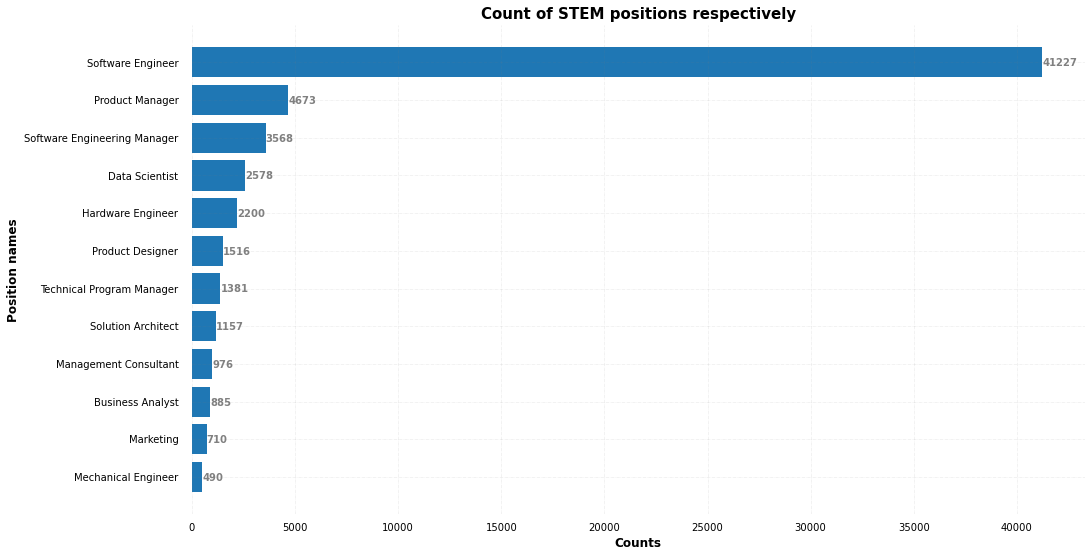

In [30]:
title = df_position['title'].head(12)
C_ount = df_position['Count'].head(12)
 
# Figure Size
fig, ax = plt.subplots(figsize =(16, 9))
 
# Horizontal Bar Plot
ax.barh(title, C_ount)

for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
    
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)

ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)

ax.invert_yaxis()

for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='grey')

plt.xlabel('Counts', fontweight ='bold', fontsize = 12)
plt.ylabel('Position names', fontweight ='bold', fontsize = 12)
    
ax.set_title('Count of STEM positions respectively',
             loc ='center', fontweight ='bold', fontsize = 15)

plt.show()

<b> 8. Data cleaning for the "location" column </b> <br>
Count the locations and display it on a nice table in ascending order

In [33]:
df_loc=pd.DataFrame(df_sub['location'],columns=['location','Count'])
df_loc['Count']=1
df_loc=df_loc.groupby('location').sum()

df_loc.reset_index(inplace=True)
df_loc.sort_values('Count',ascending=False,inplace=True)

df_loc

,location,Count
858,"Seattle, WA",8701
822,"San Francisco, CA",6797
644,"New York, NY",4562
765,"Redmond, WA",2649
609,"Mountain View, CA",2275
...,...,...
346,"Glen Allen, VA",1
348,"Gliwice, SL, Poland",1
349,"Goa, GA, India",1
771,"Reidsville, NC",1


8.1 Split the location for the ease of analyzing

In [38]:
df_sub[['city', 'state', 'country_', 'others']] = df_sub['location'].str.split(',', expand=True)
df_sub[['city', 'state', 'country_','others']].value_counts()

city   state  country_  others
Seoul   KG     Korea     South    23
Suwon   KG     Korea     South     1
dtype: int64

8.2 Drop the unnesessary instances and convert NaN values with USA

In [39]:
df_sub['country'] = df_sub['country_'] + df_sub['others'].fillna('')
df_sub = df_sub.drop (['others','country_'],1)
df_sub.country.fillna('USA',inplace=True)
df_sub[['city', 'state', 'country']].value_counts()

C:\Users\nrosnei\AppData\Local\Temp/ipykernel_24140/2305727153.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df_sub = df_sub.drop (['others','country_'],1)


city           state  country
Seattle         WA    USA        8701
San Francisco   CA    USA        6797
New York        NY    USA        4562
Redmond         WA    USA        2649
Mountain View   CA    USA        2275
                                 ... 
Glen Allen      VA    USA           1
Gliwice         SL     Poland       1
Goa             GA     India        1
Reidsville      NC    USA           1
Miramar         FL    USA           1
Length: 1050, dtype: int64

8.3 Plot bar graph for the top 10 country

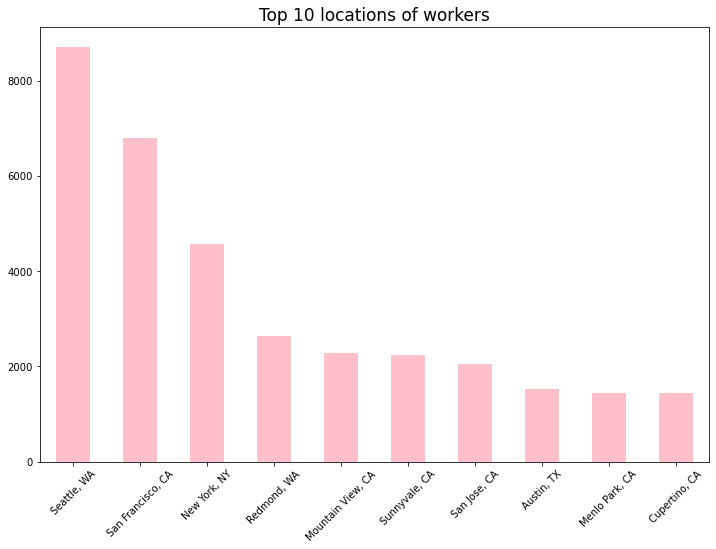

In [40]:
plt.figure(figsize=(12,8))
df_sub["location"].value_counts().iloc[:10].plot(kind="bar", color="pink")
plt.title("Top 10 locations of workers", size=17)
plt.xticks(rotation=45)
plt.show()

In [ ]:
#Didn't complete my data cleaning part for company hence, unable to include this graph plot

In [125]:
df_comp=pd.DataFrame(df_sub['company'],columns=['company','Count'])
df_comp['Count']=1
df_comp=df_comp.groupby('company').sum()

df_comp.reset_index(inplace=True)
df_comp.sort_values('Count',ascending=False,inplace=True)

df_comp

,company,Count
81,Amazon,8054
962,Microsoft,5162
658,Google,4313
550,Facebook,2962
117,Apple,2015
...,...,...
991,Msft,1
992,Mural,1
993,Mutual Of Omaha,1
998,NASDAQ,1


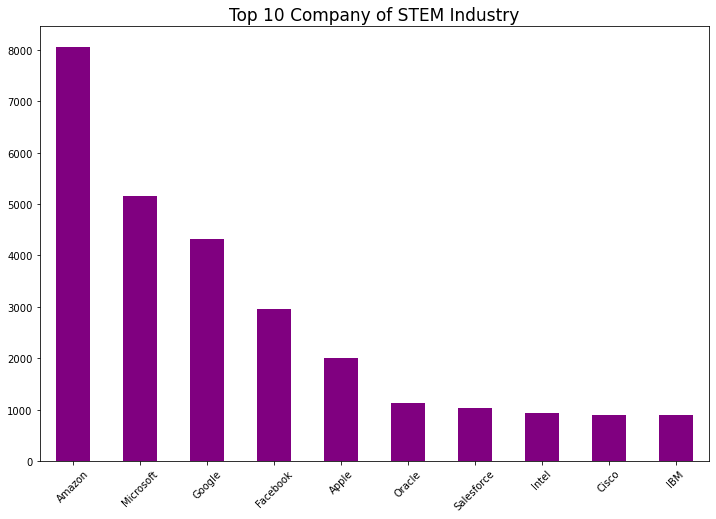

In [132]:
plt.figure(figsize=(12,8))
df_sub["company"].value_counts().iloc[:10].plot(kind="bar", color="purple")
plt.title("Top 10 Company of STEM Industry", size=17)
plt.xticks(rotation=45)
plt.show()

In [134]:
#df_sub['basesalary'].replace(0, np.mean(df['basesalary']), inplace=True)

#df_sub.head()

In [ ]:
#df_sub.describe()

In [ ]:
#basic salary, yearly compensation, bonus?
#mean, normalize, standard scaler?

In [7]:
df.to_excel('Levels_Salary_Data_2017-2022.xlsx',index=True, header=True)

<note>
    
Junior = 1 - 4 years
Mid-level = 5-9 years
Senior = 10+ years

or 
0-1 years
104 years
5-9 years
10-19 years
20 years and above

Living cost


Introduction of team?

## Appendix

<draft>
Best Jobs in America 2022 Employees' Choice (2022). Glassdoor. Retrived on May 3, 2022 from
https://www.glassdoor.com/List/Best-Jobs-in-America-LST_KQ0,20.htm

Data Scientist Salary-The Ultimate Guide for 2021 (2022). ProjectPro. Retrived on May 3, 2022 from https://www.projectpro.io/article/data-scientist-salary-the-ultimate-guide-for-2021/218

Davenport, T H. & Patil, DJ. (2012). Data Scientist: The Sexiest Job of the 21st Century. *HARVARD BUSINESS REVIEW*. Retrieved on 3 May, 2022 from https://hbr.org/2012/10/data-scientist-the-sexiest-job-of-the-21st-century

Martin, I., Mariello, A., Battiti, R. & Hernandez, J A. (2018). Salary Prediction in the IT Job Market with Few High-Dimensional Samples: A Spanish Case Study. *International Journal of Computational Intelligence Systems, 11, 1192-1209*. https://libkey.io/libraries/2611/articles/225996272/full-text-file   
    
    
Miller, H., Seckel, Ea., White, CL., et al. (2021). Gender-based salary differences in academic medicine: a retrospective review of data from six public medical centers in the Western USA. http://dx.doi.org/10.1136/bmjopen-2021-059216
    
Seaman, A. (2021). LinkedIn Jobs on the Rise: 15 opportunities that are in demand and hiring now. Retrieved on May 3, 2022 from https://www.linkedin.com/pulse/linkedin-jobs-rise-15-opportunities-demand-hiring-now-andrew-seaman/
    
P. Khongchai and P. Songmuang, "Improving students' motivation to study using salary prediction system," 2016 13th International Joint Conference on Computer Science and Software Engineering (JCSSE), 2016, pp. 1-6, doi: 10.1109/JCSSE.2016.7748896.
    
Schau, C. G., & Heyward, V. H. (1987). Salary Equity: Similarities and Differences in Outcomes from Two Common Prediction Models. American Educational Research Journal, 24(2), 271–286. https://doi.org/10.2307/1162894
    
Ashish Pawha & Deepali Kamthania (2019) Quantitative analysis of historical data for prediction of job salary in India - A case study, Journal of Statistics and Management Systems, 22:2, 187-198, DOI: 10.1080/09720510.2019.1580900

    